<a href="https://colab.research.google.com/github/shayar/DM-Final-Project/blob/main/MJC_SS_Data_Mining_Final_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Data Mining Final Project

by

Matthew Curran and

Shayar Shrestha

# Load Data and Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'http://pluto.hood.edu/~dong/datasets/osa_hf.csv'
data = pd.read_csv(url, header='infer')
data.head(1)

,bmi,hospital_expire_flag,los,age,charlson,"Calculated Bicarbonate, Whole Blood",Calculated Total CO2,"Chloride, Whole Blood",Free Calcium,Glucose,...,insurance_Medicare,insurance_Other,admission_type_DIRECT EMER.,admission_type_DIRECT OBSERVATION,admission_type_ELECTIVE,admission_type_EU OBSERVATION,admission_type_EW EMER.,admission_type_OBSERVATION ADMIT,admission_type_SURGICAL SAME DAY ADMISSION,admission_type_URGENT
0,0.21743,0,0.902069,0.611765,0.45,0.0,0.068493,0.090909,0.564516,0.103448,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# EDA

Dataset Overview
Shape: (10841, 764)
Column Data Types:
float64    763
int64        1
Name: count, dtype: int64
No missing values found.

Unique Values in Each Column:
Hepatitis A Virus IgM Antibody                             1
Lymphocytes.2                                              1
Salicylate                                                 1
Benzodiazepine Screen                                      1
Rheumatic disorders of both mitral and aortic valves       2
                                                        ... 
Creatinine                                                49
Glucose.1                                                 52
age                                                       82
bmi                                                      856
los                                                     7502
Length: 764, dtype: int64

Constant Features (No Variance): ['Benzodiazepine Screen', 'Hepatitis A Virus IgM Antibody', 'Salicylate', 'Lymphocytes.2']

Summary S

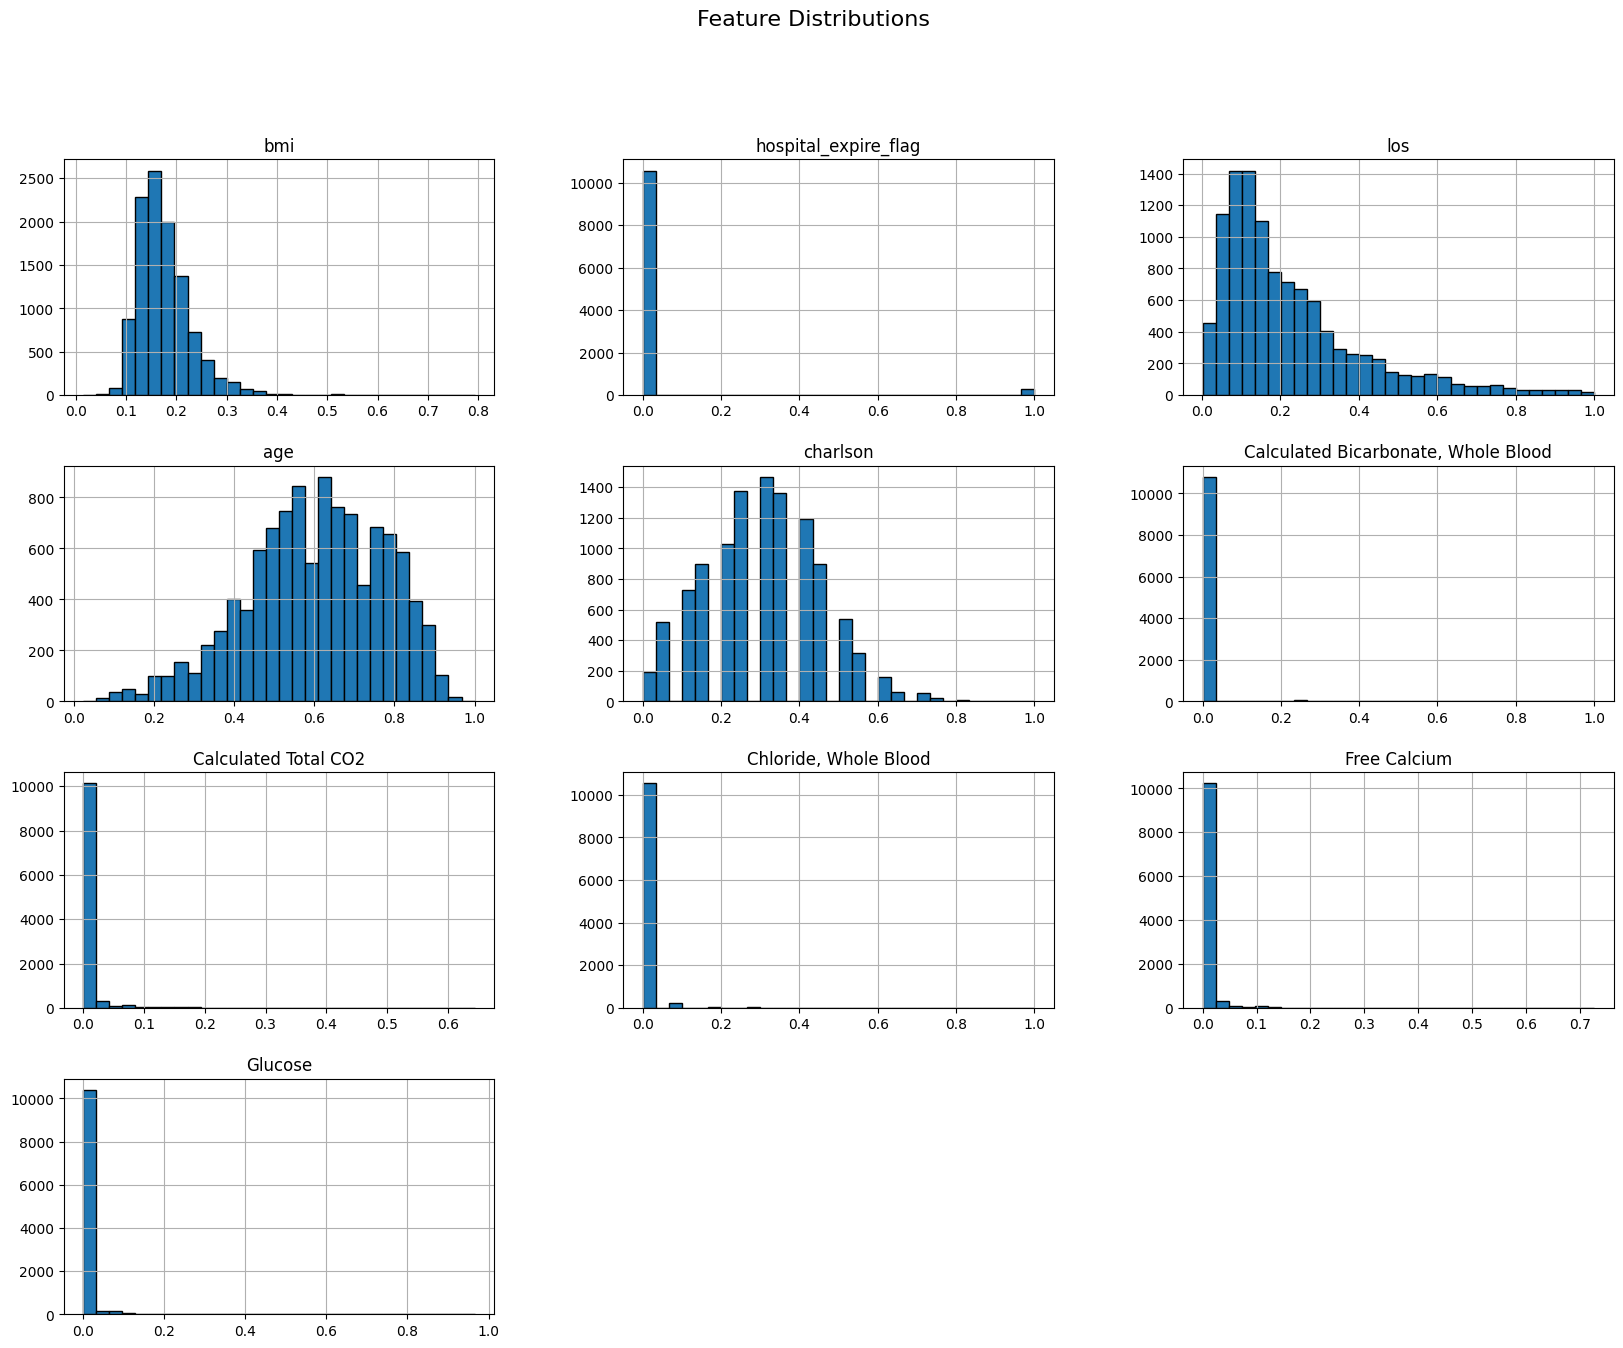


Correlation Matrix:


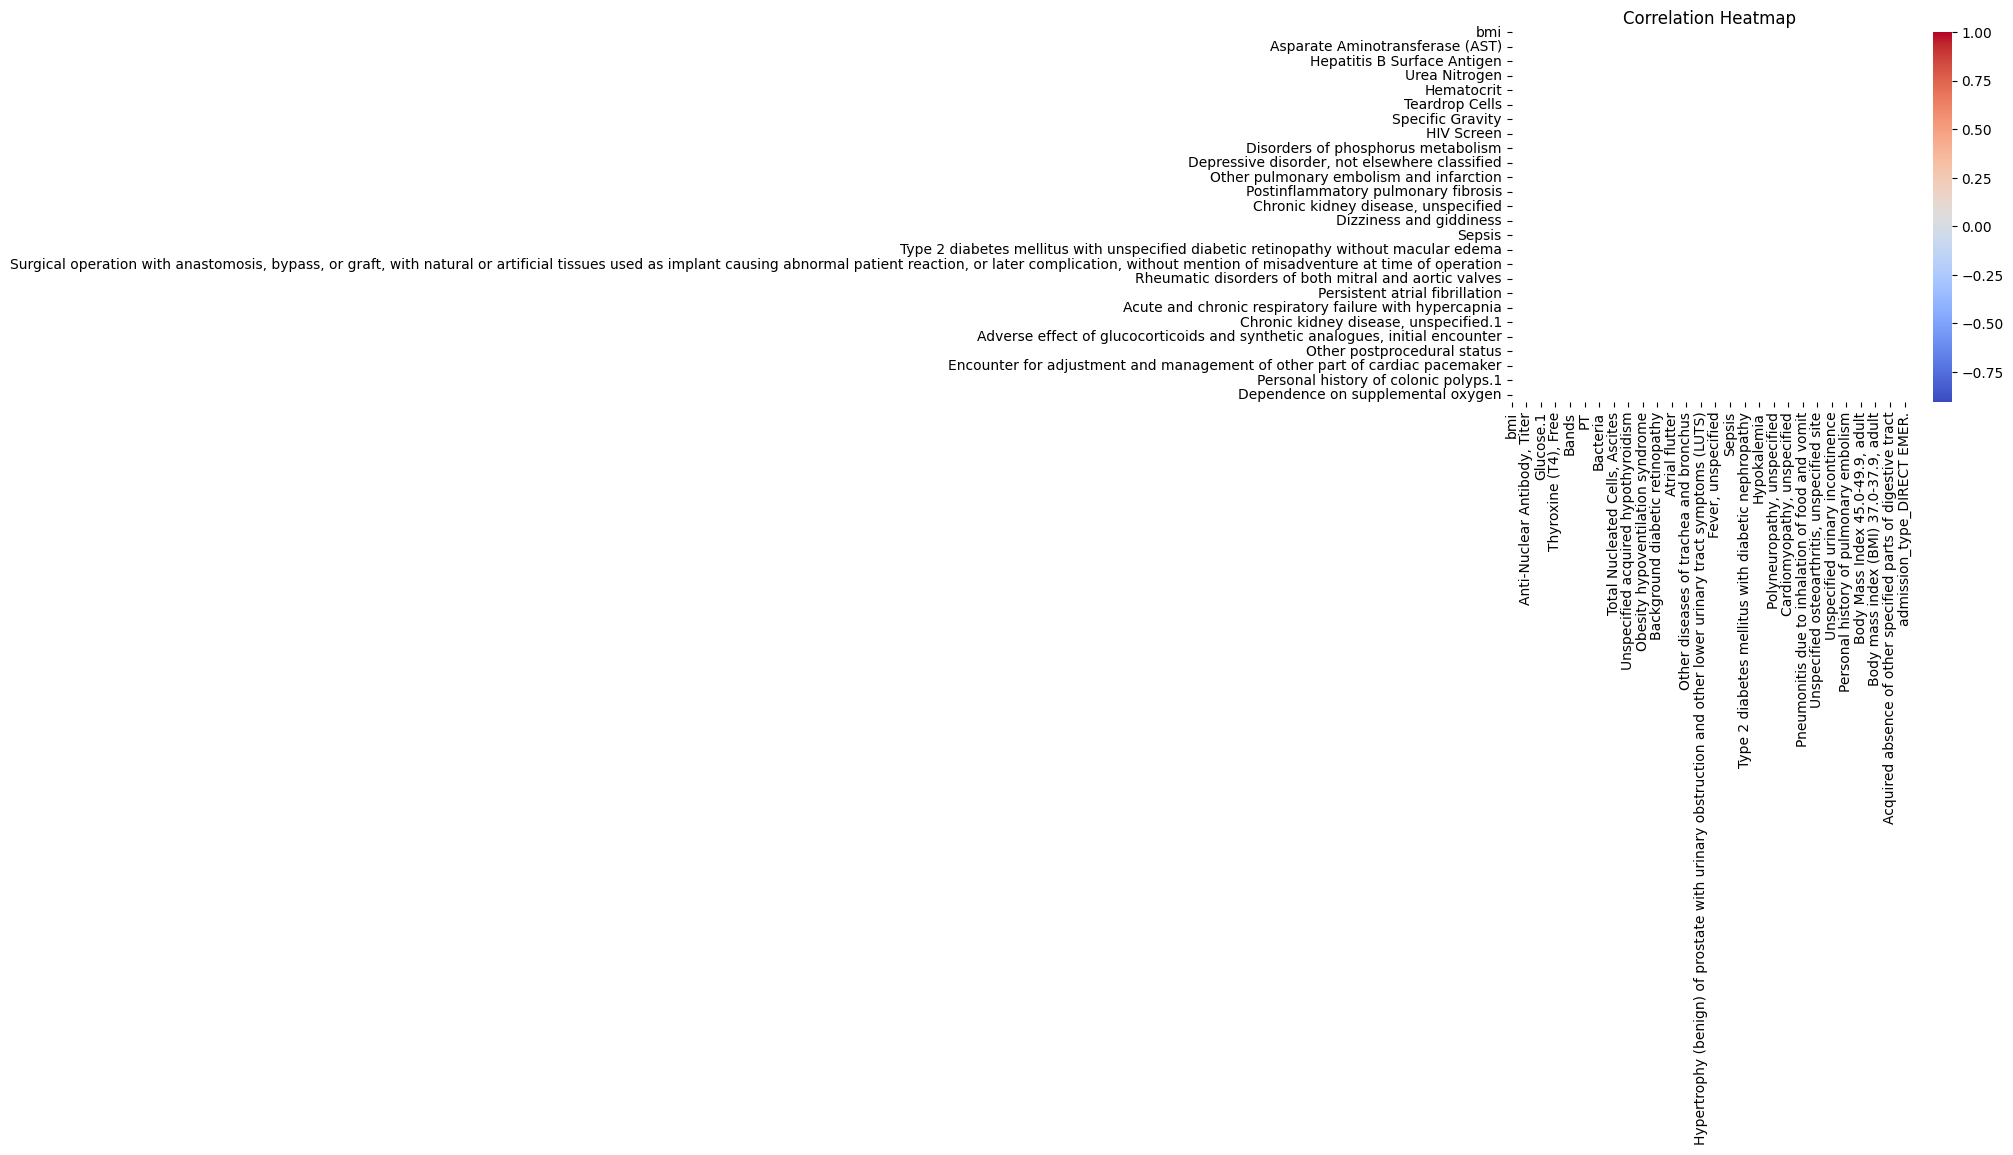


Highly Correlated Feature Pairs (Correlation > 0.85):
INR(PT)                                                                                                           PT                                 0.998946
Iron Binding Capacity, Total                                                                                      Transferrin                        0.995909
Lymphocytes                                                                                                       Total Nucleated Cells, Ascites     0.993811
RBC, Ascites                                                                                                      Total Nucleated Cells, Ascites     0.990722
Lymphocytes.4                                                                                                     Total Nucleated Cells, Pleural     0.988424
Polys                                                                                                             Total Nucleated Cells, Ascites     0.9876

In [5]:
print("Dataset Overview")
print(f"Shape: {data.shape}")
print("Column Data Types:")
print(data.dtypes.value_counts())

# Check for missing values
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
if not missing_values.empty:
    print("Missing Values Count:")
    print(missing_values)
else:
    print("No missing values found.")

# Checking unique values
print("\nUnique Values in Each Column:")
print(data.nunique().sort_values())

# Identifying features with only one unique value, as they provide no useful information
constant_features = [col for col in data.columns if data[col].nunique() == 1]
print("\nConstant Features (No Variance):", constant_features)

# Summary statistics
print("\nSummary Statistics:")
print(data.describe().T)

# Visualize the distribution of a random sample of columns (for the first 10 columns)
print("\nVisualizing feature distributions...")
data.iloc[:, :10].hist(figsize=(20, 15), bins=30, layout=(4, 3), edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

# Correlational Analysis
print("\nCorrelation Matrix:")
corr_matrix = data.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Checking highly correlated features (correlations above 0.85)
high_corr_pairs = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_pairs = high_corr_pairs.stack().sort_values(ascending=False)
print("\nHighly Correlated Feature Pairs (Correlation > 0.85):")
print(high_corr_pairs[high_corr_pairs > 0.85])

# Outlier Detection
outlier_counts = {}
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))).sum()
    if outliers > 0:
        outlier_counts[col] = outliers
print("\nOutliers Detected:")
print(outlier_counts)

# References

# Print All

In [ ]:
# PRINT TO PDF
# do not include the output from installation.
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc
!pip install nbconvert

# Clear output:
from IPython.display import clear_output
clear_output()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!jupyter nbconvert '/content/drive/MyDrive/Colab Notebooks/MJC_SS_Data_Mining_Final_Part_2.ipynb' --to pdf

[NbConvertApp] WARNING | pattern '/content/drive/MyDrive/Colab Notebooks/MJC_SS_Data_Mining_Final_Part_2.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    